In [1]:
import numpy as np
import pandas as pd

Let's create a list of prices

In [2]:
prices = pd.DataFrame({"Asset_1": [30, 31.2, 33.5, 32.6, 28.5],
                      "Asset_2": [51, 59.6, 68.4, 61.9, 63.7]})
prices

,Asset_1,Asset_2
0,30.0,51.0
1,31.2,59.6
2,33.5,68.4
3,32.6,61.9
4,28.5,63.7


The return for each asset

In [3]:
prices.iloc[1:]

,Asset_1,Asset_2
1,31.2,59.6
2,33.5,68.4
3,32.6,61.9
4,28.5,63.7


In [4]:
prices.iloc[:-1]

,Asset_1,Asset_2
0,30.0,51.0
1,31.2,59.6
2,33.5,68.4
3,32.6,61.9


Need to use .values to transform the DataFrame in a numpy array, otherwise there is an issue as the index are different

In [5]:
prices.values

array([[30. , 51. ],
       [31.2, 59.6],
       [33.5, 68.4],
       [32.6, 61.9],
       [28.5, 63.7]])

In [6]:
(prices.iloc[1:]/prices.iloc[:-1].values)

,Asset_1,Asset_2
1,1.040000,1.168627
2,1.073718,1.147651
3,0.973134,0.904971
4,0.874233,1.029079


Another way to get the same thing

In [7]:
prices.shift(1)

,Asset_1,Asset_2
0,NaN,NaN
1,30.0,51.0
2,31.2,59.6
3,33.5,68.4
4,32.6,61.9


In [8]:
prices.iloc[1:]/prices.shift(1)

,Asset_1,Asset_2
0,NaN,NaN
1,1.040000,1.168627
2,1.073718,1.147651
3,0.973134,0.904971
4,0.874233,1.029079


Finally, there is a function which computes automatically these values

In [9]:
prices.pct_change()

,Asset_1,Asset_2
0,NaN,NaN
1,0.040000,0.168627
2,0.073718,0.147651
3,-0.026866,-0.095029
4,-0.125767,0.029079


In [10]:
# Same thing except with -1

# Now with more data

Let's use some sample data

In [11]:
prices = pd.read_csv("data/sample_prices.csv")
prices.head()

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


In [12]:
prices.count()

BLUE      13
ORANGE    13
dtype: int64

<Axes: >

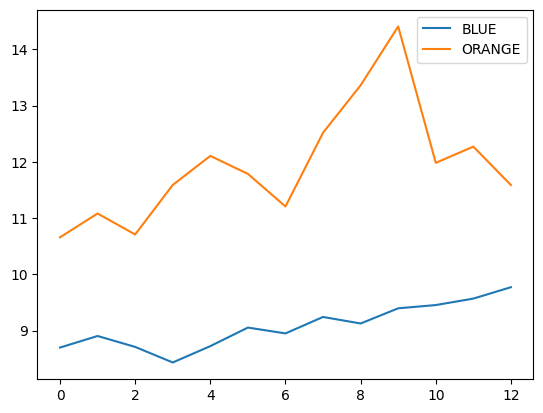

In [13]:
prices.plot()

In [14]:
returns = prices.pct_change()
returns.head()

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


<Axes: >

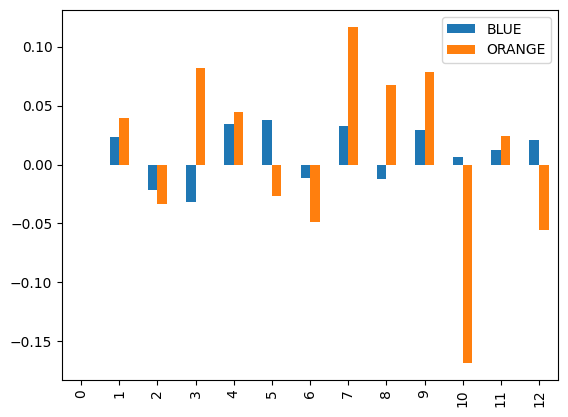

In [15]:
returns.plot.bar()

We can see that the orange asset is way more volatile than the blue one, let's verify that:

First, the mean of return

In [16]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

Same mean!

In [17]:
volatility = returns.std()
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

Of course, the standard deviation of Orange is greater than the Blue one

Now we want to compute the total return

In [18]:
returns.head()

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


In [19]:
(((returns+1).prod()-1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

Same as

In [20]:
np.prod(returns+1, axis=0)

BLUE      1.123310
ORANGE    1.087167
dtype: float64

Even with the same mean of returns, the Blue asset has a total return of 12.33% while the Orange one has 8.72%!

# Annualized returns

Monthly returns

In [21]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

Daily returns

In [22]:
rd = 0.0005
(1+rd)**252 - 1

0.1342464508625716

(252 trading days in a year)

# More data

In [23]:
monthly_prices = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0, na_values=-99.99)
monthly_prices.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [24]:
# We only keep Lo 10 & Hi 10

In [25]:
col = ["Lo 10", "Hi 10"]
prices = monthly_prices[col]
prices.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [26]:
# It is in percent, we want this format: 19% --> 0.19

In [27]:
prices_up = prices/100
prices_up.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [28]:
# Let's rename the columns

In [29]:
prices_up.columns = ["SmallCap", "LargeCap"]
prices_up.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<Axes: >

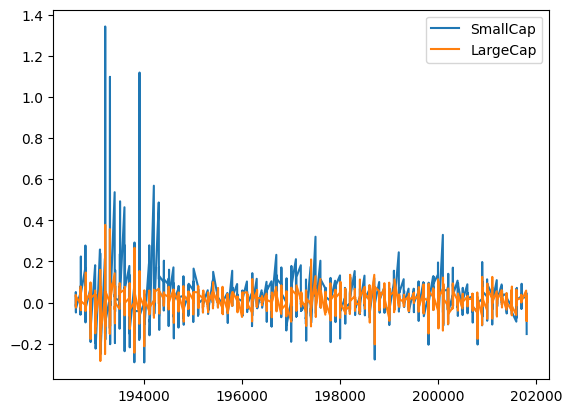

In [30]:
prices_up.plot()

## Monthly return

In [31]:
nber_months = prices_up.shape[0]
monthly_return = (prices_up+1).prod()**(1/nber_months)-1
monthly_return

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [32]:
annualized_return = (monthly_return+1)**12 - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [33]:
# Volatility

In [34]:
error = prices_up - prices_up.mean()
squared_error = error**2
variance = squared_error.mean()
std_manual = np.sqrt(variance)
std_manual

SmallCap    0.106240
LargeCap    0.053876
dtype: float64

In [35]:
volatility = prices_up.std()
volatility

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [36]:
# The difference comes from the fact that std takes the sample mean while squared_error.mean() takes n elements, let's compute the mean manually

In [37]:
variance2 = (squared_error.sum())/(nber_months-1)
std__man2 = variance2**0.5
std__man2

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [38]:
# For a year

In [39]:
annualized_volatility = volatility*np.sqrt(12)
annualized_volatility

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [40]:
risk_free = 0.03
sharpe_ratio = (annualized_return - risk_free)/annualized_volatility
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

# Drawdown

In [41]:
prices_up.index = pd.to_datetime(prices_up.index, format="%Y%m")
prices_up.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [42]:
# We still need to change the date to period: Month

In [44]:
prices_up.index = prices_up.index.to_period("M")
prices_up.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

In [45]:
prices_up.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [51]:
prices_up.loc["1975"]

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [52]:
# We are going to compute the drawdown

<Axes: >

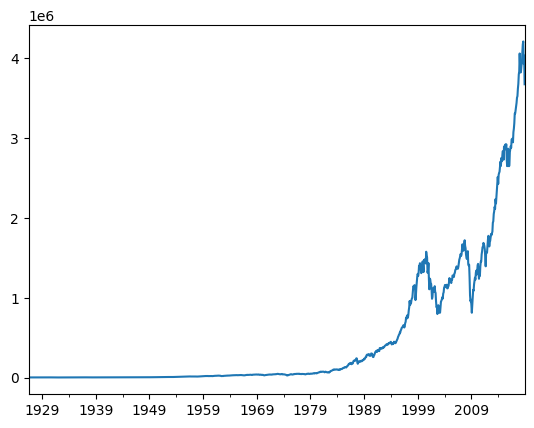

In [58]:
wealth_index = 1000*(prices_up["LargeCap"]+1).cumprod()
wealth_index.plot()

<Axes: >

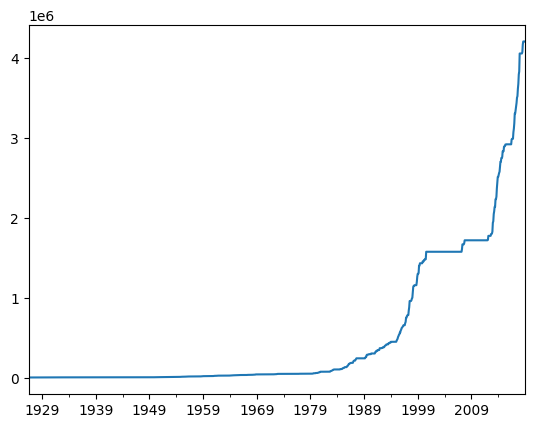

In [60]:
evolution_peaks = wealth_index.cummax()
evolution_peaks.plot()

<Axes: >

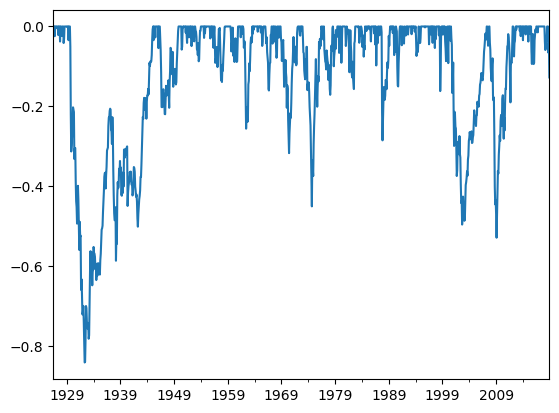

In [61]:
drawdown = (wealth_index - evolution_peaks)/evolution_peaks
drawdown.plot()

In [62]:
drawdown.min()

-0.8400375277943123

In [63]:
drawdown.idxmin()

Period('1932-05', 'M')

<Axes: >

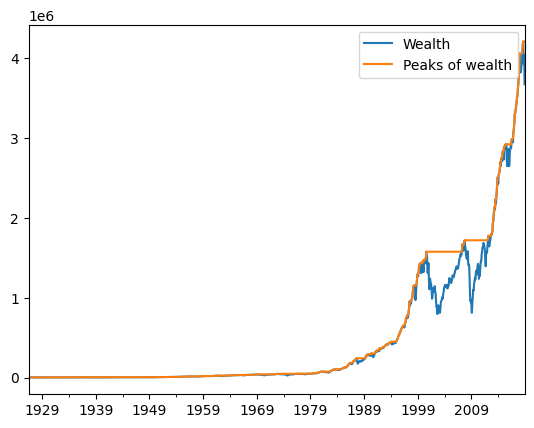

In [65]:
max_wealth = pd.DataFrame({
    "Wealth": wealth_index,
    "Peaks of wealth": evolution_peaks
})
max_wealth.plot()